# Reading clean data to Pandas Dataframe

In [1]:
import pandas as pd
df = pd.read_csv('WeatherFinalCleanData.csv').set_index('date')

In [2]:
#To assess the correlation in this data
df.corr()[['temperatureMean']].sort_values('temperatureMean')

,temperatureMean
windSpeed_1,-0.328440
windSpeed_2,-0.326325
windSpeed_3,-0.323898
temperatureMax,-0.045982
temperatureMax_1,-0.044794
temperatureMax_2,-0.043915
temperatureMax_3,-0.043024
humidity_1,0.026511
humidity_2,0.027350
humidity_3,0.028272


In [7]:
predictors = ['temperatureMean_1',  'temperatureMean_2',  'temperatureMean_3', 
              'temperatureMin_1',   'temperatureMin_2',   'temperatureMin_3',
              'dewPoint_1', 'dewPoint_2', 'dewPoint_3',
              'humidity_1',  'humidity_2',  'humidity_3',
              'windSpeed_1',  'windSpeed_2',  'windSpeed_3',
              'temperatureMax_1',   'temperatureMax_2',   'temperatureMax_3']
df2 = df[['temperatureMean'] + predictors]

# Visualizing the Relationships

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

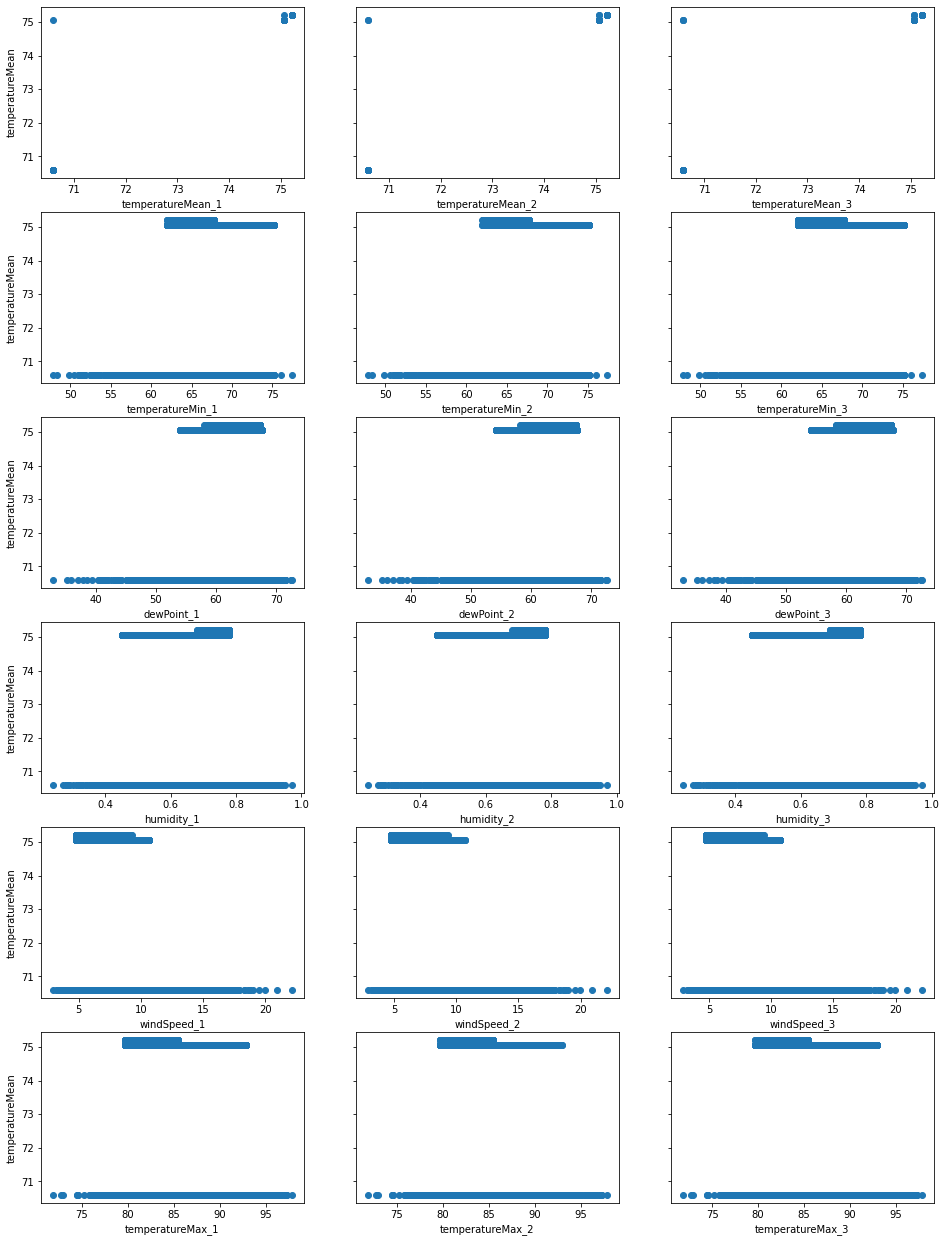

In [8]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['temperatureMean'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='temperatureMean')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

# Using Step-wise Regression to Build a Robust Model

In [12]:
# import the relevant module
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df2[predictors]
y = df2['temperatureMean']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)
X.iloc[:5, :5]

,const,temperatureMean_1,temperatureMean_2,temperatureMean_3,temperatureMin_1
date,,,,,
2018/01/04,1.0,70.5929,70.5929,70.5929,64.04
2018/01/05,1.0,70.5929,70.5929,70.5929,60.63
2018/01/06,1.0,70.5929,70.5929,70.5929,56.63
2018/01/07,1.0,70.5929,70.5929,70.5929,56.11
2018/01/08,1.0,70.5929,70.5929,70.5929,55.52


In [13]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperatureMean   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.607e+04
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:09:31   Log-Likelihood:                 1528.1
No. Observations:                1823   AIC:                            -3018.
Df Residuals:                    1804   BIC:                            -2914.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0041      0.159     -0.026      0.979      -0.316       0.307
temperatureMean_1     0.9982      0.024     42.396      0.000       0.952       1.044
temperatureMean_2  4.371e-06      0.033      0.000      1.000      -0.065       0.065
temperatureMean_3     0.0008      0.024      0.033      0.973      -0.045       0.047
temperatureMin_1      0.0004      0.002      0.165      0.869      -0.004       0.005
temperatureMin_2      0.0002      0.003      0.084      0.933      -0.005       0.005
temperatureMin_3      0.0003      0.002      0.136      0.892      -0.004       0.005
dewPoint_1           -0.0004      0.003     -0.134      0.893      -0.006       0.005
dewPoint_2           -0.0003      0.003     -0.083      0.934      -0.007       0.007
dewPoint_3           -0.0005      0.003     -0.189      0.850      -0.006       0.005
humidity_1            0.0267      0.156      0.171      0.864      -0.279       0.333
humidity_2            0.0144      0.187      0.077      0.939      -0.352       0.380
humidity_3            0.0346      0.155      0.223      0.823      -0.270       0.339
windSpeed_1        4.894e-05      0.003      0.019      0.985      -0.005       0.005
windSpeed_2       -1.154e-05      0.004     -0.003      0.998      -0.007       0.007
windSpeed_3           0.0003      0.003      0.093      0.926      -0.005       0.006
temperatureMax_1      0.0002      0.002      0.101      0.919      -0.005       0.005
temperatureMax_2   9.116e-05      0.003      0.031      0.975      -0.006       0.006
temperatureMax_3      0.0002      0.002      0.077      0.939      -0.005       0.005
==============================================================================
Omnibus:                     5499.558   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        249202717.258
Skew:                          42.510   Prob(JB):                         0.00
Kurtosis:                    1812.296   Cond. No.                     2.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that meandewptm_3 has the greatest p-value and that it is
#             greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('dewPoint_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperatureMean   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.881e+04
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:11:34   Log-Likelihood:                 1528.1
No. Observations:                1823   AIC:                            -3020.
Df Residuals:                    1805   BIC:                            -2921.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0008      0.157      0.005      0.996      -0.306       0.308
temperatureMean_1     0.9982      0.024     42.408      0.000       0.952       1.044
temperatureMean_2  3.219e-06      0.033   9.68e-05      1.000      -0.065       0.065
temperatureMean_3     0.0008      0.024      0.033      0.974      -0.045       0.047
temperatureMin_1      0.0005      0.002      0.200      0.841      -0.004       0.005
temperatureMin_2      0.0003      0.003      0.108      0.914      -0.005       0.005
temperatureMin_3   7.417e-05      0.002      0.040      0.968      -0.004       0.004
dewPoint_1           -0.0004      0.003     -0.142      0.887      -0.006       0.005
dewPoint_2           -0.0007      0.003     -0.233      0.816      -0.006       0.005
humidity_1            0.0288      0.156      0.185      0.853      -0.276       0.334
humidity_2            0.0304      0.166      0.183      0.855      -0.296       0.356
humidity_3            0.0095      0.080      0.119      0.905      -0.147       0.166
windSpeed_1        4.818e-05      0.003      0.018      0.985      -0.005       0.005
windSpeed_2       -4.436e-05      0.004     -0.012      0.990      -0.007       0.007
windSpeed_3           0.0003      0.003      0.106      0.916      -0.005       0.006
temperatureMax_1      0.0003      0.002      0.105      0.916      -0.005       0.005
temperatureMax_2      0.0002      0.003      0.060      0.952      -0.005       0.006
temperatureMax_3   5.413e-05      0.002      0.023      0.982      -0.005       0.005
==============================================================================
Omnibus:                     5499.615   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        249221794.816
Skew:                          42.511   Prob(JB):                         0.00
Kurtosis:                    1812.366   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temperatureMean   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.881e+04
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:11:53   Log-Likelihood:                 1528.1
No. Observations:                1823   AIC:                            -3020.
Df Residuals:                    1805   BIC:                            -2921.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0008      0.157      0.005      0.996      -0.306       0.308
temperatureMean_1     0.9982      0.024     42.408      0.000       0.952       1.044
temperatureMean_2  3.219e-06      0.033   9.68e-05      1.000      -0.065       0.065
temperatureMean_3     0.0008      0.024      0.033      0.974      -0.045       0.047
temperatureMin_1      0.0005      0.002      0.200      0.841      -0.004       0.005
temperatureMin_2      0.0003      0.003      0.108      0.914      -0.005       0.005
temperatureMin_3   7.417e-05      0.002      0.040      0.968      -0.004       0.004
dewPoint_1           -0.0004      0.003     -0.142      0.887      -0.006       0.005
dewPoint_2           -0.0007      0.003     -0.233      0.816      -0.006       0.005
humidity_1            0.0288      0.156      0.185      0.853      -0.276       0.334
humidity_2            0.0304      0.166      0.183      0.855      -0.296       0.356
humidity_3            0.0095      0.080      0.119      0.905      -0.147       0.166
windSpeed_1        4.818e-05      0.003      0.018      0.985      -0.005       0.005
windSpeed_2       -4.436e-05      0.004     -0.012      0.990      -0.007       0.007
windSpeed_3           0.0003      0.003      0.106      0.916      -0.005       0.006
temperatureMax_1      0.0003      0.002      0.105      0.916      -0.005       0.005
temperatureMax_2      0.0002      0.003      0.060      0.952      -0.005       0.006
temperatureMax_3   5.413e-05      0.002      0.023      0.982      -0.005       0.005
==============================================================================
Omnibus:                     5499.615   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        249221794.816
Skew:                          42.511   Prob(JB):                         0.00
Kurtosis:                    1812.366   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Using SciKit-Learn's LinearRegression Module to Predict the Weather

In [16]:
from sklearn.model_selection import train_test_split
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [30]:
from sklearn.linear_model import LinearRegression
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.4f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.4f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.4f degrees celsius" % median_absolute_error(y_test, prediction))

The Explained Variance: 1.0000
The Mean Absolute Error: 0.0050 degrees celsius
The Median Absolute Error: 0.0033 degrees celsius
